This is based on Finhacks 2018 data science competition sponsored by Bank Central Asia (BCA). There are three competition, one of them is credit default. This is my code for that competition that achieve 45th position with score 0.85 and the best score is 0.87.

### Importing Library
| Packages | Description |
|:---|:---|
|`pandas` | for manipulating data/tables |
|`numpy` | for matrix/array manipulation |
| `matplotlib.pyplot` | for plotting data |
| `seaborn` | for plotting statistical properties |
| `os` | for interacting with base operating system |
| `pprint`| for printing dictionary in more readable format|
| `warnings` | so we could ignore all warning |
| `scipy.stats import zscore` | so we could transform array using zscore transform |
| `matplotlib inline` | so we could plot the image directly in the Notebook |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pprint

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
%matplotlib inline

#### Helper Function

We have two helper function which is `describe_dataframe` which we use to describing dataframe statistical properties and values and `log10_transform` which we use to transfrom data. 

In [2]:
def describe_dataframe(dataframe):
    # Create a dictionary which have every detected categorical value counts in a dataframe and NaN ratio 
    describe_df = {}
    for j in dataframe.dtypes.value_counts().index:
        describe_dict = {}
        cols = dataframe.select_dtypes([j]).columns
        for i in cols:
            if dataframe[i].nunique() < 28:
                describe_dict[str(i)] = {"total_category": dict(dataframe[i].value_counts()), 
                                         "NaN_ratio": dataframe[i].isnull().sum()/float(dataframe.shape[0])}
        describe_df[str(j)] = describe_dict
        print('Total', str(j), 'Classification:', len(describe_dict.keys()), "from", len(cols))
    return describe_df

def log10_transform(ret_ser):
    # Transform all input data with log10 function
    Series = pd.Series(ret_ser)
    positive = Series[Series > 1]
    negative = Series[Series < -1]
    compressed = Series[Series < 1][Series > -1]
    Series.loc[positive.index] = np.log10(positive)
    Series.loc[negative.index] = np.log10(abs(negative)) * -1
    Series.loc[compressed.index] = 0
    return Series

| Line Number | Explanation |
|:---:|:---|
|`1`| Printing all available file inside directory `Credit Score/data_input`|
|`2` & `3` | Importing `npl_train.csv` and `npl_test.csv` to pandas DataFrame |
|`6` & `7` | Printing the shape of both training dataset and test dataset.<br><br> First element is the number of rows and second element is the number of columns |
| `9` | Printing the ratio between test and train size |

In [3]:
print("Data: ",os.listdir("Credit Score/data_input"))

df_train = pd.read_csv("Credit Score/data_input/npl_train.csv")
df_test = pd.read_csv("Credit Score/data_input/npl_test.csv")

print("Train Shape: ",df_train.shape)
print("Test Shape: ",df_test.shape)

print("Test to train ratio: ", df_test.shape[0]/df_train.shape[0])
pprint.pprint(describe_dataframe(df_train))

Data:  ['npl_test.csv', 'npl_train.csv']
Train Shape:  (15493, 24)
Test Shape:  (2214, 23)
Test to train ratio:  0.1429032466275092
Total float64 Classification: 0 from 18
Total int64 Classification: 3 from 5
Total object Classification: 1 from 1
{'float64': {},
 'int64': {'flag_kredit_macet': {'NaN_ratio': 0.0,
                                 'total_category': {0: 14134, 1: 1359}},
           'jumlah_kartu': {'NaN_ratio': 0.0,
                            'total_category': {1: 76,
                                               2: 10734,
                                               3: 2795,
                                               4: 1136,
                                               5: 460,
                                               6: 151,
                                               7: 75,
                                               8: 27,
                                               9: 16,
                                               10: 7,
                  

| Line Number | Explanation |
|:---:|:---|
|`1`| Deciding Training label/target |
|`2` & `3`| Separate the samples id in both training set and test set |
|`4`| Printing the value of the label/target. <br> $0$ stands for not default and $1$ stands for default |
|`6` & `7`| Dropping samples id from training set and test set because it is not useful for learning process |
|`9` & `10`| Fill all NaN value in `kode_cabang` column with string `"X"` in training set and test set |

In [4]:
target = df_train["flag_kredit_macet"]
train_id = df_train["X"]
test_id = df_test["X"]
print("Target number:", dict(target.value_counts()))

df_train.drop("X", axis=1, inplace=True)
df_test.drop("X", axis=1, inplace=True)

df_train["kode_cabang"] = df_train["kode_cabang"].fillna("X")
df_test["kode_cabang"] = df_test["kode_cabang"].fillna("X")

Target number: {0: 14134, 1: 1359}


| Line Number | Explanation |
|:---:|:---|
|`2` & `5`| Creating a boolean masking for non credit default and credit default |
|`11` & `14`| Defining minimum accuracy that should be acheived with random guessing and number of default credit compared to the rest of training set |
|`12` & `15`| Printing minimum accuracy and default credit ratio |

In [5]:
# Kredit lunas
condition_0 = df_train["flag_kredit_macet"] == 0

# Kredit macet
condition_1 = df_train["flag_kredit_macet"] == 1 

# Describing Minimum Accuracy
a = len(target[condition_0])
b = len(target[condition_1])

minimum_accuracy = a / (a + b)
print("Minimum Accuracy:", minimum_accuracy)

default_ratio_overall = 1 - minimum_accuracy
print("Overall Default Ratio:", default_ratio_overall)

Minimum Accuracy: 0.9122829665010005
Overall Default Ratio: 0.08771703349899951


| Line Number | Explanation |
|:---:|:---|
|`1`| Describing training set |
|`4` & `8`| Loops for finding which column is continuous and discrete |
|`12` & `16`| Printing the discrete and continuous column |

In [6]:
train_desc = describe_dataframe(df_train)

disc_col, cont_col = [], []
for i in train_desc.keys():
    for j in train_desc[i].keys():
        disc_col.append(j)
        
for i in df_test.columns:
    if i not in disc_col:
        cont_col.append(i)

print("\n Discrete Column")
for num, col in enumerate(disc_col):
    print(str(num) + ".",col)

print("\n Continuous Column")
for num, col in enumerate(cont_col):
    print(str(num) + ".",col)

Total float64 Classification: 0 from 18
Total int64 Classification: 3 from 4
Total object Classification: 1 from 1

 Discrete Column
0. jumlah_kartu
1. skor_delikuensi
2. flag_kredit_macet
3. kode_cabang

 Continuous Column
0. outstanding
1. limit_kredit
2. tagihan
3. total_pemakaian_tunai
4. total_pemakaian_retail
5. sisa_tagihan_tidak_terbayar
6. rasio_pembayaran
7. persentasi_overlimit
8. rasio_pembayaran_3bulan
9. rasio_pembayaran_6bulan
10. jumlah_tahun_sejak_pembukaan_kredit
11. total_pemakaian
12. sisa_tagihan_per_jumlah_kartu
13. sisa_tagihan_per_limit
14. total_pemakaian_per_limit
15. pemakaian_3bln_per_limit
16. pemakaian_6bln_per_limit
17. utilisasi_3bulan
18. utilisasi_6bulan


#### Statistical Properties

This section write statistical properties such as mean, median, min, quartile, max, skewness, kurtosis, and range.

In [7]:
# Describing continuous column 
q0 = df_train[cont_col].describe().T
q0.drop("count", axis=1, inplace=True)

q0["skew"] = [df_train[i].skew() for i in q0.index]
q0["kurt"] = [df_train[i].kurt() for i in q0.index]
q0["range"] = q0["max"] - q0["min"]

q1 = df_test[cont_col].describe().T
q1.drop("count", axis=1, inplace=True)

q1["skew"] = [df_test[i].skew() for i in q1.index]
q1["kurt"] = [df_test[i].kurt() for i in q1.index]
q1["range"] = q1["max"] - q1["min"]
q1.index = [i + "_test" for i in q1.index]

data_detail = pd.concat([q0,q1])
data_detail

,mean,std,min,25%,50%,75%,max,skew,kurt,range
outstanding,1.159833e+07,2.408569e+07,0.000000e+00,2.000551e+06,4.726943e+06,1.064848e+07,7.980586e+08,10.341333,232.186803,7.980586e+08
limit_kredit,2.079833e+07,2.955334e+07,3.000000e+06,5.000000e+06,9.000000e+06,2.200000e+07,1.000000e+09,7.289970,171.576858,9.970000e+08
tagihan,8.078663e+06,1.761286e+07,2.004300e+04,8.182500e+05,3.145857e+06,7.404991e+06,6.280000e+08,9.386488,188.493207,6.279800e+08
total_pemakaian_tunai,7.453291e+04,6.184139e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.884057e+07,21.379228,738.892466,2.884057e+07
total_pemakaian_retail,2.025857e+06,7.927677e+06,-1.566720e+07,0.000000e+00,2.010420e+05,1.398000e+06,2.850000e+08,16.453043,439.824563,3.006672e+08
sisa_tagihan_tidak_terbayar,8.140875e+06,1.922430e+07,0.000000e+00,0.000000e+00,2.750923e+06,7.143198e+06,4.440000e+08,7.933674,121.095235,4.440000e+08
rasio_pembayaran,6.464712e+01,7.941694e+02,-1.813800e+04,0.000000e+00,2.700000e+01,1.000000e+02,6.898300e+04,64.049361,4949.169602,8.712100e+04
persentasi_overlimit,3.343533e+00,9.241921e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.060000e+00,1.900000e+02,7.016402,82.191593,1.900000e+02
rasio_pembayaran_3bulan,5.053035e+01,1.327275e+03,-5.779234e+04,2.020000e+01,5.000000e+01,9.137000e+01,7.557500e+04,-7.236662,1511.408674,1.333673e+05
rasio_pembayaran_6bulan,8.166624e+01,1.467822e+03,-7.705600e+04,2.160000e+01,6.560000e+01,1.000000e+02,5.489900e+04,-15.094037,1910.233468,1.319550e+05


#### Payment Inactivity

The payment inactivity is a good indicator for credit default. Train set and test set are given new column to indicate samples inactivity

In [8]:
# Payment inactivity

a = df_train["rasio_pembayaran"] < 10
b = df_train["rasio_pembayaran_3bulan"] < 10
c = df_train["rasio_pembayaran_6bulan"] < 10

a_t = df_test["rasio_pembayaran"] < 10
b_t = df_test["rasio_pembayaran_3bulan"] < 10
c_t = df_test["rasio_pembayaran_6bulan"] < 10

df_train["tidak_mampu_bayar"] = a & b & c
df_test["tidak_mampu_bayar"] = a_t & b_t & c_t

q = df_train["tidak_mampu_bayar"]
df_train["tidak_mampu_bayar"] = q.replace(q.unique(), range(q.nunique()))

q = df_test["tidak_mampu_bayar"]
df_test["tidak_mampu_bayar"] = q.replace(q.unique(), range(q.nunique()))

#### Total Spent in Previous Month
Train set dan data set don't provide previous month usage but provide credit limit and previous month utilisation. Assuming that credit limit does not change we can infer the usage of previous month.

In [9]:
# Usage in Number

df_train["pemakaian_3bln"] = df_train["limit_kredit"] * df_train["utilisasi_3bulan"]
df_train["pemakaian_6bln"] = df_train["limit_kredit"] * df_train["utilisasi_6bulan"]

df_test["pemakaian_3bln"] = df_test["limit_kredit"] * df_test["utilisasi_3bulan"]
df_test["pemakaian_6bln"] = df_test["limit_kredit"] * df_test["utilisasi_6bulan"]

#### Inactivity
Long usage inactivity while still leaving a debt behind is also good indicator of credit default.

In [10]:
# Usage inactivity

a = df_train["total_pemakaian_per_limit"] ==0
b = df_train["pemakaian_3bln_per_limit"] ==0
c = df_train["pemakaian_6bln_per_limit"] ==0

df_train["tidak_aktif"] = a & b & c

a = df_test["total_pemakaian_per_limit"] == 0
b = df_test["pemakaian_3bln_per_limit"] == 0
c = df_test["pemakaian_6bln_per_limit"] == 0

df_test["tidak_aktif"] = a & b & c

### Binning Credit Age

We both binning -- categorize the sample to a certain number -- column `jumlah_tahun_sejak_pembukaan_kredit` to a 10 part. We do it to train set and test set

In [11]:
# Digitize tahun pembukaan
q = np.percentile(df_train.jumlah_tahun_sejak_pembukaan_kredit, np.linspace(0,100, 10))
q = pd.cut(df_train.jumlah_tahun_sejak_pembukaan_kredit, q, include_lowest=True)
q = q.replace(q.unique(), range(q.nunique()))

df_train.jumlah_tahun_sejak_pembukaan_kredit = q

q = np.percentile(df_test.jumlah_tahun_sejak_pembukaan_kredit, np.linspace(0,100,10))
q = pd.cut(df_test.jumlah_tahun_sejak_pembukaan_kredit, q, include_lowest=True)
q = q.replace(q.unique(), range(q.nunique()))

df_test.jumlah_tahun_sejak_pembukaan_kredit = q

#### Log Transform

Because log transform cannot be used on data with negative value. One way to counter it is to make any negative value positve  using absolute function. This approach have flaw which all data around $[-1,1]$ is squished to zero. So any column that have negative value and have value between $[-1,1]$ is regarded as cannot be transformed.

In [12]:
def isAble2Transform(Series):
    condition = len(Series[Series <= 0]) == 0 
    condition_0 = len(Series[Series < 1][Series > -1]) == 0
    condition_1 = len(Series[Series > 0][Series < 1][Series != 0]) == 0
    if condition:
        print(str(Series.name) + " can be transformed!")
        return Series.name
    elif condition_0:
        print(str(Series.name) + " can be transformed!")
        return Series.name
    elif condition_1:
        print(str(Series.name) + " can be transformed!")
        return Series.name
    else:
        print("There is a value between [-1, 1] --- " + str(Series.name) + " advised not to be transformed")
        return None
        
print("\n")

transform_column = []
for i in q0.index:
    transform_column.append(isAble2Transform(df_train[i]))

# List of value that can be transformed by log transform
transform_column = [i for i in transform_column if i is not None]

unable_trans = [i for i in q0.index if i not in transform_column]



outstanding can be transformed!
limit_kredit can be transformed!
tagihan can be transformed!
total_pemakaian_tunai can be transformed!
total_pemakaian_retail can be transformed!
sisa_tagihan_tidak_terbayar can be transformed!
There is a value between [-1, 1] --- rasio_pembayaran advised not to be transformed
There is a value between [-1, 1] --- persentasi_overlimit advised not to be transformed
There is a value between [-1, 1] --- rasio_pembayaran_3bulan advised not to be transformed
rasio_pembayaran_6bulan can be transformed!
jumlah_tahun_sejak_pembukaan_kredit can be transformed!
total_pemakaian can be transformed!
sisa_tagihan_per_jumlah_kartu can be transformed!
There is a value between [-1, 1] --- sisa_tagihan_per_limit advised not to be transformed
There is a value between [-1, 1] --- total_pemakaian_per_limit advised not to be transformed
There is a value between [-1, 1] --- pemakaian_3bln_per_limit advised not to be transformed
There is a value between [-1, 1] --- pemakaian_6

Necessity of using log transform is based on high kurtosis and skewness in a column. A low kurtosis and skewness does not need to be transformed using log transform.

In [13]:
print("\nFeature that unable to transform but have a high skewness:")
for i in data_detail[np.abs(data_detail["skew"]) > 5].index:
    if i in unable_trans:
        print("-",i)

over_kurt = data_detail[np.abs(data_detail["kurt"]) > 10].index
print("\nFeature that unable to transform but have a high kurtosis:")
for i in over_kurt:
    if i in unable_trans:
        print("-",i)


Feature that unable to transform but have a high skewness:
- rasio_pembayaran
- persentasi_overlimit
- rasio_pembayaran_3bulan
- pemakaian_6bln_per_limit

Feature that unable to transform but have a high kurtosis:
- rasio_pembayaran
- persentasi_overlimit
- rasio_pembayaran_3bulan
- total_pemakaian_per_limit
- pemakaian_3bln_per_limit
- pemakaian_6bln_per_limit
- utilisasi_6bulan


#### Z-Score Transform

Z-Score transform makes data have mean zero and standard deviation 1. Apply Z-Score transformation to log transformed column.

In [14]:
# Transforming column with log10 transform
for i in transform_column:
    df_train[i] = zscore(log10_transform(df_train[i]))
    df_test[i] = zscore(log10_transform(df_test[i]))

#### Handling Untransformed

We handle high skewness or high kurtosis data and cannot be transformed using binning. We bin transfrom column `persentasi_overlimit`

In [15]:
# Overlimit handling; later will be numbered since high > medium > low > no relationship will be retained
# Need to be transformed into a function for better readibility
Series = df_train["persentasi_overlimit"]
percentil = np.percentile(Series, np.linspace(0,100,11))
binned = pd.cut(Series, np.unique(percentil), include_lowest=True)

Series_test = df_test["persentasi_overlimit"]
percentil_test = np.percentile(Series_test, np.linspace(0,100,11))
binned_test = pd.cut(Series_test, np.unique(percentil_test), include_lowest=True)

index__ = binned.value_counts().sort_index().index
index__test = binned_test.value_counts().sort_index().index
replacement = range(len(index__))
replacement_test = range(len(index__test))

binned = binned.replace(index__, replacement)
binned_test = binned_test.replace(index__test, replacement_test)

df_train[Series.name] = binned
df_test[Series.name] = binned_test

Binning function for `rasio_pembayaran`

In [16]:
# rasio_pembayaran = bayaran/tagihan; also applies to its derivative
Series = df_train["rasio_pembayaran"]
percentil = np.percentile(Series, np.linspace(0,100,11))
binned = pd.cut(Series, np.unique(percentil), include_lowest=True)

Series_test = df_test["rasio_pembayaran"]
percentil_test = np.percentile(Series_test, np.linspace(0,100,11))
binned_test = pd.cut(Series_test, np.unique(percentil_test), include_lowest=True)

index__ = binned.value_counts().sort_index().index
index__test = binned_test.value_counts().sort_index().index
replacement = range(len(index__))
replacement_test = range(len(index__test))

binned = binned.replace(index__, replacement)
binned_test = binned_test.replace(index__test, replacement_test)

df_train[Series.name] = binned
df_test[Series.name] = binned_test

Binning function for `rasio_pembayaran_3bulan`

In [17]:
Series = df_train["rasio_pembayaran_3bulan"]
percentil = np.percentile(Series, np.linspace(0,100,11))
binned = pd.cut(df_train.rasio_pembayaran_3bulan, np.unique(percentil), include_lowest=True)

Series_test = df_test["rasio_pembayaran_3bulan"]
percentil_test = np.percentile(Series_test, np.linspace(0,100,11))
binned_test = pd.cut(Series_test, np.unique(percentil_test), include_lowest=True)

index__ = binned.value_counts().sort_index().index
index__test = binned_test.value_counts().sort_index().index
replacement = range(len(index__))
replacement_test = range(len(index__test))

binned = binned.replace(index__, replacement)
binned_test = binned_test.replace(index__test, replacement_test)

df_train[Series.name] = binned
df_test[Series.name] = binned_test

#### Dummies and Recheck

| Line Number | Explanation |
|:---:|:---|
|`2` & `3`| Using pandas `get_dummies` to get one hot encode in both train and test set |
|`5` & `6`| Check the size after one-hot encode; should be larger |
|`8` & `12`| Loop to check what is inside train set column but not inside test set column and vice versa |

In [18]:
# Get dummies for discrete variable
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print("After Dummies train shape:",df_train.shape)
print("After Dummies test shape:",df_test.shape)

for i in df_train.columns:
    if i not in df_test.columns:
        print("NOT IN TEST: ",i)
        
for i in df_test.columns:
    if i not in df_train.columns:
        print("NOT IN TRAIN:",i)

After Dummies train shape: (15493, 38)
After Dummies test shape: (2214, 37)
NOT IN TEST:  flag_kredit_macet


## Modelling

| Package | Explanation |
|:---|:---|
|`roc_auc_score` | ROC (Receiveing Operator Characteristics) metrics for measuring accuracy |
|`StratifiedKFold`| KFold cross validation |
|`train_test_split`| Splitting features and label to training and test set for features and label |
|`GridSearchCV`| Searching exhautively hyper parameter for estimator |
|`SGDClassifier`| Stochastic Gradient Descent estimator |
|`LogisticRegression`| Logistic Regression estimator |
|`DecisionTreeClassifier`| Decision Tree Classifier estimator |
|`GradientBoostingClassifier`| Gradient Boosting Classifier estimator|
|`LinearDiscriminantAnalysis`| Linear Discriminant Analysis estimator|

In [19]:
# --------------------------------------- 
#                MODELLING 
# --------------------------------------- 

print("START MODELLING...")

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

START MODELLING...


| Line Number | Explanation |
|:---:|:---|
|`1`| Dropping column `flag_kredit_macet` for feature and selecting column `flag_kredit_macet` for label <br> `X` is for feature and `y` is for label|
|`2`| Declaring number for random state |
|`3`| Splitting `X` and `y` to `X_train`, `X_test`, `y_train`, `y_test` |

In [20]:
X, y = df_train.drop("flag_kredit_macet", axis=1), df_train["flag_kredit_macet"]
rstate = 77
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rstate)

Defining function for cross validation which split the feature and label using stratified K fold.

In [21]:
def manual_cross_validation(estimator, X, y, cv=StratifiedKFold(n_splits = 5)):
    arr = []
    for train_index, test_index in cv.split(X, y):
        estimator.fit(X.loc[train_index], y.loc[train_index])
        estimator_probs = estimator.predict_proba(X.loc[test_index])
        arr.append(roc_auc_score(y.loc[test_index], estimator_probs[:,1]))
    return arr, np.mean(arr), np.std(arr)

Declaring estimator and append it to an array. After all estimator are declared, we use it to train data and validate the result using function we previously built. We print the mean and standard deviation of K fold result.

In [22]:
estimators = []
estimators.append(SGDClassifier(random_state=rstate, loss="log"))
estimators.append(LogisticRegression(random_state=rstate))
estimators.append(DecisionTreeClassifier(random_state=rstate, max_depth=5))
estimators.append(GradientBoostingClassifier(random_state=rstate))
estimators.append(LinearDiscriminantAnalysis())

estimator_list = ["SGD", "LR", "DTC", "GBC", "LDA"]
est_mean, est_std = [], []
for i, estimator in enumerate(estimators):
    print("Fitting", estimator_list[i])
    arr, mean, std = manual_cross_validation(estimator, X, y)
    est_mean.append(mean)
    est_std.append(std)

# For Visualization
# cv_res = pd.DataFrame({"CV_AVG": est_mean, "CV_STD": est_std, "Estimator": estimator_list})
# g = sns.barplot("CV_AVG", "Estimator", data=cv_res, orient="h")
# g.set_xlabel("AVERAGE SCORE")
# g = g.set_title("CROSS VALIDATION SCORE")

i = pd.DataFrame([est_mean, est_std]).T
i.index=estimator_list
i.columns=["mean", "std"]
print(i)

Fitting SGD
Fitting LR
Fitting DTC
Fitting GBC
Fitting LDA
         mean       std
SGD  0.492828  0.012436
LR   0.464344  0.016796
DTC  0.808701  0.012246
GBC  0.848670  0.013940
LDA  0.823698  0.013338


We choose Logistic Regression, Decision Tree Classifier, and Gradient Boosting Classifier as our methods to estimate label. Each of estimator will be given a list parameter that it should train with. We print the best parameter of each estimator. 

In [23]:
# Selected Estimator
LR_params = {
    "penalty": ["l2"],
    "tol": [1e-6],
    "C": [1e-2],
    "solver": ["liblinear", "newton-cg", "sag"],
    "max_iter": [4e3, 6e3],
    "random_state": [rstate]
}

LR_GS = GridSearchCV(LogisticRegression(), 
                     param_grid=LR_params, 
                     cv=StratifiedKFold(n_splits = 5), 
                     scoring="roc_auc", 
                     verbose=1, n_jobs=4)
LR_GS.fit(X, y)
LR_best = LR_GS.best_estimator_
print(LR_GS.best_params_)

DTC_params = {
    "splitter": ["best", "random"],
    "max_depth": [3, 5, 8, None],
    "min_samples_split": [2, 3, 5],
    "min_samples_leaf": [1, 3, 5],
    "max_features": [0.1, 0.5, 0.8],
    "max_leaf_nodes": [3, 5, None],
    "random_state": [rstate]
}

DTC_GS = GridSearchCV(DecisionTreeClassifier(), 
                      param_grid=DTC_params, 
                      cv=StratifiedKFold(n_splits = 5), 
                      scoring="roc_auc", 
                      verbose=1, n_jobs=4)
DTC_GS.fit(X, y)
DTC_best = DTC_GS.best_estimator_
print(DTC_GS.best_params_)

GBC_params = {
    "learning_rate": [1e-3],
    "n_estimators": [7000, 7500],
    "max_depth": [5],
    "subsample": [0.8],
    "max_features": [None],
    "init": [None],
    "random_state": [rstate]
}

GBC_GS = GridSearchCV(GradientBoostingClassifier(), 
                      param_grid=GBC_params, 
                      cv=StratifiedKFold(n_splits = 5), 
                      scoring="roc_auc", 
                      verbose=1, n_jobs=4)
GBC_GS.fit(X, y)
GBC_best = GBC_GS.best_estimator_
print(GBC_GS.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  4.2min finished


{'C': 0.01, 'max_iter': 4000.0, 'penalty': 'l2', 'random_state': 77, 'solver': 'newton-cg', 'tol': 1e-06}
Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   40.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   46.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   56.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 3240 out of 3240 | elapsed:  3.0min finished


{'max_depth': 5, 'max_features': 0.8, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 77, 'splitter': 'best'}
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 22.2min finished


{'init': None, 'learning_rate': 0.001, 'max_depth': 5, 'max_features': None, 'n_estimators': 7500, 'random_state': 77, 'subsample': 0.8}


Plotting learning result

<module 'matplotlib.pyplot' from 'C:\\ANACONDA\\lib\\site-packages\\matplotlib\\pyplot.py'>

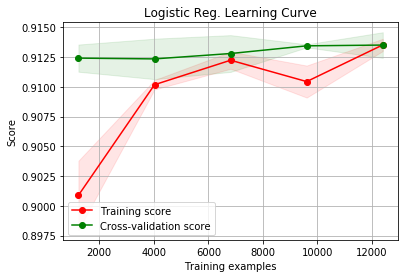

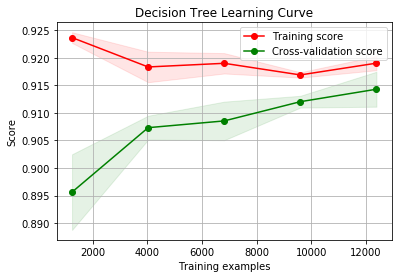

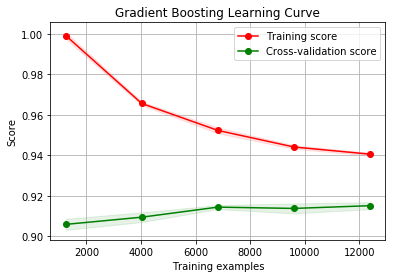

In [24]:
def plot_learning_result(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    #Original code from sklearn page Plotting Learning Curve with slight modification
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig("Credit Score/plot/" + title + ".png")
    return plt

from sklearn.model_selection import learning_curve

plot_learning_result(LR_GS.best_estimator_, "Logistic Reg. Learning Curve", X, y, cv=StratifiedKFold(n_splits = 5), n_jobs=4)

plot_learning_result(DTC_GS.best_estimator_, "Decision Tree Learning Curve", X, y, cv=StratifiedKFold(n_splits = 5), n_jobs=4)

plot_learning_result(GBC_GS.best_estimator_, "Gradient Boosting Learning Curve", X, y, cv=StratifiedKFold(n_splits = 5), n_jobs=4)

We choose Gradient Boosting because it have better score than the rest of estimator. We predict the probability of being default. We need to convert it to rigid binary choice. We find the probability threshold that if certain probability is above threshold, it means the credit defaulted and vice versa. We create `probs_threshold` and `BestThreshold` function to do this. This happen in line `15`, `16`, and `17`.

We print the final validation in line `19`. After we see it good enough, we create submission of our estimation of test set. This happen in line `21` through `24`.

In [25]:
def probs_threshold(array, threshold):
    return [1 if i >= threshold else 0 for i in array]

def BestThreshold(estimator, X, y, range_prob=np.linspace(1e-4, 0.2, 1000)):
    estimator_predict = estimator.best_estimator_.predict_proba(X)
    roc_collection = []
    index_dict = {}
    for i in range_prob:
        rigid = probs_threshold(estimator_predict[:,1], i)
        roc = roc_auc_score(y, rigid)
        roc_collection.append(roc)
        index_dict[roc] = i
    return index_dict[max(roc_collection)]

GBC_threshold = BestThreshold(GBC_GS, X_test, y_test)
GBC_rigid_final = probs_threshold(GBC_GS.best_estimator_.predict_proba(X_test)[:,1], GBC_threshold)
GBC_final_score = roc_auc_score(y_test, GBC_rigid_final)

print("GBC Final Score on Rigid Prediction:", GBC_final_score)

GBC_final_predict = pd.Series(GBC_GS.best_estimator_.predict_proba(df_test)[:,1])
test_result = probs_threshold(GBC_final_predict, GBC_threshold)
result_df = pd.concat([test_id, pd.Series(test_result), GBC_final_predict], axis=1)
result_df.to_csv('CS_challenge.csv', index=False)

GBC Final Score on Rigid Prediction: 0.8653045126828391


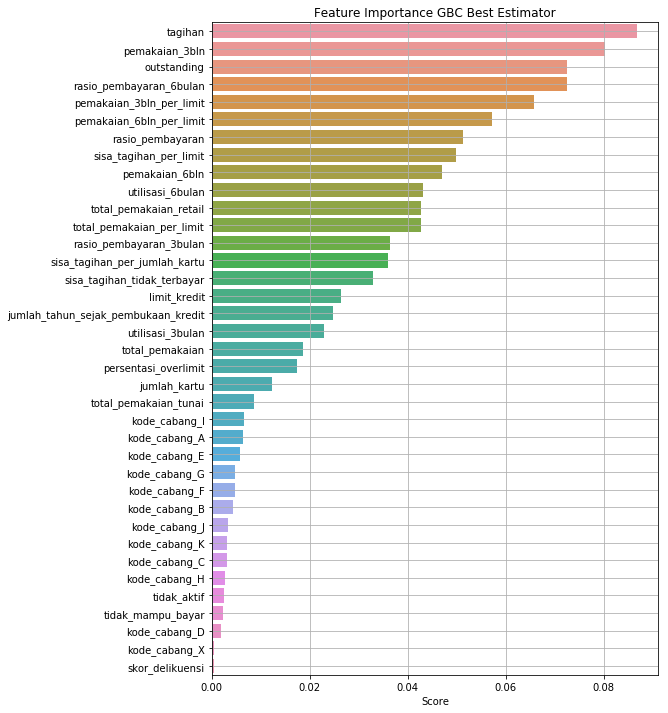

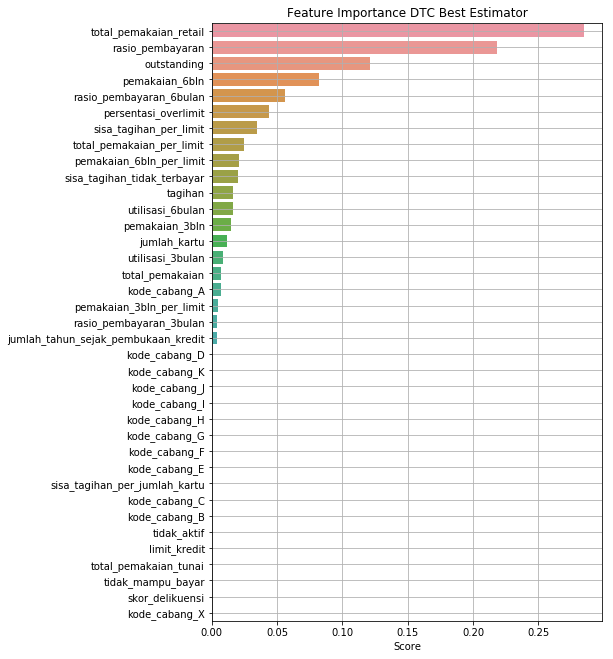

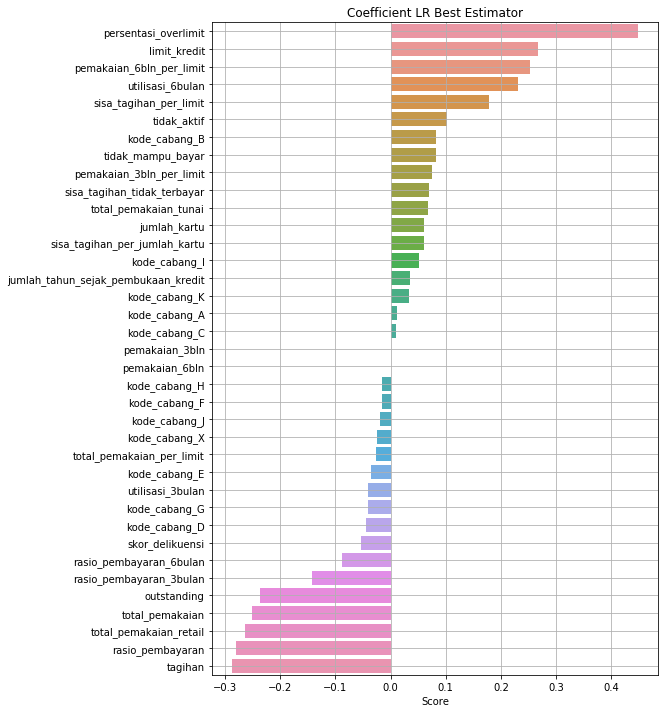

In [26]:
i = pd.DataFrame([GBC_GS.best_estimator_.feature_importances_]).T
i.index = X.columns
i = i.sort_values(0, ascending=False)
plt.figure(figsize=(8,12))
g = sns.barplot(i[0],i.index, orient="h")
g.set_xlabel("Score")
g = g.set_title("Feature Importance GBC Best Estimator")
plt.grid()
plt.savefig("Credit Score/plot/FI_GBC.png", bbox_inches="tight")

i = pd.DataFrame([DTC_GS.best_estimator_.feature_importances_]).T
i.index = X.columns
i = i.sort_values(0, ascending=False)
plt.figure(figsize=(7,11))
g = sns.barplot(i[0],i.index, orient="h")
g.set_xlabel("Score")
g = g.set_title("Feature Importance DTC Best Estimator")
plt.grid()
plt.savefig("Credit Score/plot/FI_DTC.png", bbox_inches="tight")

i = pd.DataFrame(LR_GS.best_estimator_.coef_).T
i.index = X.columns
i = i.sort_values(0, ascending=False)
plt.figure(figsize=(8,12))
g = sns.barplot(i[0],i.index, orient="h")
g.set_xlabel("Score")
g = g.set_title("Coefficient LR Best Estimator")
plt.grid()
plt.savefig("Credit Score/plot/coeff_LR.png", bbox_inches="tight")